In [2]:
import numpy as np

# Part I

In [3]:
xMin = 1.2345 
xMax = 2.3445 
nn = 17 
x = np.zeros((nn, 1))
increment = (xMax - xMin) / (nn - 1)
for i in range(nn):
    x[i] = xMin + (i * increment)

print(x)

[[1.2345  ]
 [1.303875]
 [1.37325 ]
 [1.442625]
 [1.512   ]
 [1.581375]
 [1.65075 ]
 [1.720125]
 [1.7895  ]
 [1.858875]
 [1.92825 ]
 [1.997625]
 [2.067   ]
 [2.136375]
 [2.20575 ]
 [2.275125]
 [2.3445  ]]


# Part II

### 1.

In [4]:
#patch area
def area(lat): #longitude does not influence patch area, since the lines are parallel.
    R = 6378137 # radius of earth in meters.
    lat = 90 - lat - 0.5 # to account for north being at 90 degrees and to center the patch.
    area = ((2 * np.pi ** 2 * R ** 2)/(180 * 360)) * np.cos(lat/180*np.pi) #area of each patch
    return area


# original ocean volume
H = np.loadtxt('topography_180x360_grid.txt')

total_vol = 0
for lat in range(180):
    for lon in range(360):
        elev = H[lat, lon]
        if (elev < 0):
            total_vol += (area(lat) * abs(elev))

new_vol = 0
for lat in range(180):
    for lon in range(360):
        elev = H[lat, lon]
        if (elev < -650):
            new_vol += (area(lat) * abs(elev))
            
print("% of water remaining: ", new_vol / total_vol)

% of water remaining:  0.9951178853712691


### 2.

In [5]:
# total area now
total_area = 0
for lat in range(180):
    for lon in range(360):
        total_area += area(lat) 
        
# water new area
water_area = 0
for lat in range(180):
    for lon in range(360):
        if (H[lat, lon] < 550):
            water_area += area(lat) 
            
print("% of new water area: ", water_area/total_area)

% of new water area:  0.8775520272695465


### 3.

In [6]:
# water volume with elevation 0 (normal):
total_vol = 0
for lat in range(180):
    for lon in range(360):
        elev = H[lat, lon]
        if elev < 0:
            total_vol += (area(lat) * abs(elev))
print("Water volume at normal elevation: ", total_vol)

# water volume with elevation k (new):
k = 357
new_vol = 0
for lat in range(180):
    for lon in range(360):
        elev = H[lat, lon]
        if elev < k:
            new_vol += (area(lat) * abs(elev))
print("Water volume at new elevation:    ", new_vol)

percent = (new_vol/total_vol)*100 - 100

print("Percent volume increase:          ", percent)

print(" ")

print("An increase of about", k, "in water elevation would result in a", percent, "% water volume increase.")


Water volume at normal elevation:  1.339724853455374e+18
Water volume at new elevation:     1.3504452595297393e+18
Percent volume increase:           0.8001946106109443
 
An increase of about 357 in water elevation would result in a 0.8001946106109443 % water volume increase.


# Part III

### a.

In [7]:
# Cordinates in decimal point (taken from California_coastline_05_for_lab of lab 4).
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

# plate speed at 32 degree NW angle:
v = 0.035 # in meters per year
# x and y components
yv = np.sin(32 * np.pi/180) * v # meters per year lat
xv = -np.cos(32 * np.pi/180) * v # meters per year lon


# conversion function (from meters to longitude and from meters to latitude):
def m_to_lat(m):
    R = 6378137
    m_in_lat = (2 * np.pi * R)/360
    return m/m_in_lat

def m_to_lon(m):
    R = 6378137
    m_in_lon = (np.pi * R * np.cos(35.5 * np.pi / 180))/180
    return m/m_in_lon


# time intervals:
a = 1000000 # 1 mil
b = a * 5   # 5 mil
c = a * 25  # 25 mil

# location after 1, 5, and 25 mil years
xa = xv * a
lon_a = lon_LAX + m_to_lon(xa)
ya = yv * a
lat_a = lat_LAX + m_to_lat(ya)

xb = xv * b
lon_b = lon_LAX + m_to_lon(xb)
yb = yv * b
lat_b = lat_LAX + m_to_lat(yb)

xc = xv * c
lon_c = lon_LAX + m_to_lon(xc)
yc = yv * c
lat_c = lat_LAX + m_to_lat(yc)

print("After 1 million years:", lat_a, ",", lon_a)
print("After 5 million years:", lat_b, ",", lon_b)
print("After 25 million years:", lat_c, ",", lon_c)



After 1 million years: 34.10821210104352 , -118.73601506665094
After 5 million years: 34.774660505217604 , -120.04607533325463
After 25 million years: 38.10690252608802 , -126.59637666627314


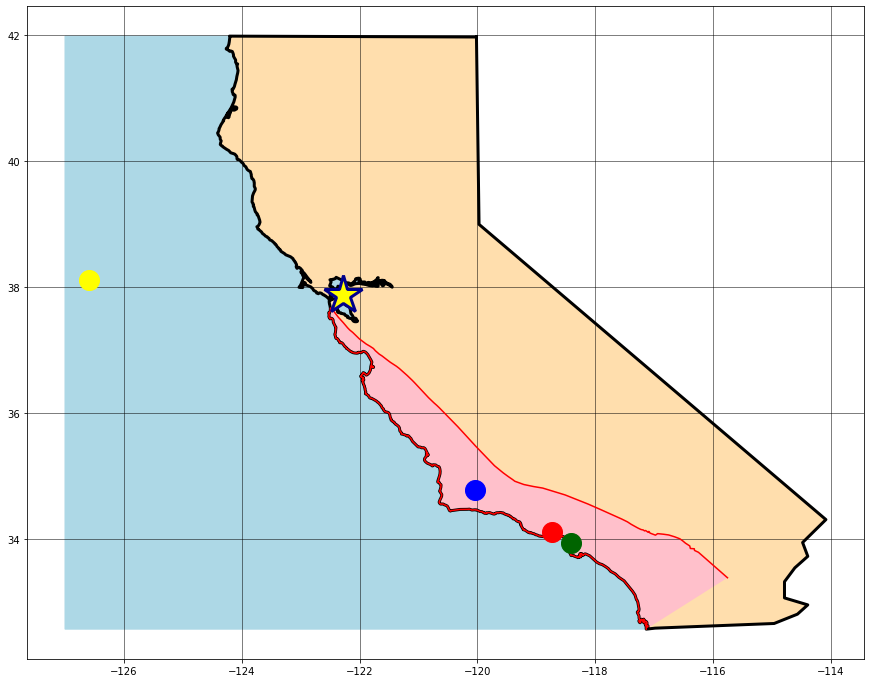

In [8]:
# Plotting: Code from California_coastline_05_for_lab of lab 4
import matplotlib.pyplot as plt

lat_min = 33;
lat_max = 42;
lon_min = -127;
lon_max = -115;

CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 

CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()

plate = np.loadtxt('plate.txt', usecols=(0,1)) 


plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_a,lat_a,'o',color='red',ms=20)
plt.plot(lon_b,lat_b,'o',color='blue',ms=20)
plt.plot(lon_c,lat_c,'o',color='yellow',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

In [36]:
#determining decent boundaries
t_min = 23400000
t_max = 23700000

ymin = yv * t_min
lat_min = lat_LAX + m_to_lat(ymin)

ymax = yv * t_max
lat_max = lat_LAX + m_to_lat(ymax)

# lat_UCB = 37.8716
print("Lat after t_min:", lat_min)
print("Lat after t_max:", lat_max)

#search through boundaries (k year increment)
closest_dist = abs(lat_min - lat_UCB)
closest_lat = lat_min
closest_year = t_min
k = 1
for i in range(t_min, t_max, k):
    ynew = yv * i
    new_lat = lat_LAX + m_to_lat(ynew)
    new_dist = abs(new_lat - lat_UCB)

    if new_dist < closest_dist:
        closest_dist = new_dist
        closest_lat = new_lat
        closest_year = i

print("Closest latutude to UCB: ", closest_lat, ", with distance:", closest_dist)
print("Closest latitude that LAX will be to UCB will occur in", closest_year, "years from now.")



Lat after t_min: 37.840323164418386
Lat after t_max: 37.890306794731444
Closest latutude to UCB:  37.87159992125048 , with distance: 7.874952245856548e-08
Closest latitude that LAX will be to UCB will occur in 23587722 years from now.


The closest that LAX will be to UCB when it comes to **latitude** will be in **23.587722** million years.